In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

from datetime import datetime
import time
from os import listdir
from os.path import isfile, join

plt.style.use('fivethirtyeight')
plt.style.use('bmh')

# Non-Pharmaceutical Interventions in Canada

Here we show comparisons of descriptive statistics for each regional and subregional-level dataset across Canada.

In [409]:
stats_columns=[
    'file',
    'region',
    'subregion', 
    'rows',
    'columns',
    'start_date.min', 
    'start_date.max', 
    'end_date.min', 
    'end_date.max', 
    'end_date.count / count', 
    'reviewer.unique', 
    'intervention_summary.unique', 
    'intervention_category.unique',
    'target_population_category.unique',
    'target_population_category (% not "General")',
    'enforcement_category.unique',
    'oxford_government_response_category.unique',
    'oxford_fiscal_measure_cad.sum',
    'source_url.unique'
]

columns=[
    'start_date',
    'end_date',
    'reviewer',
    'country',
    'region',
    'subregion',
    'intervention_summary',
    'intervention_category',
    'target_population_category',
    'enforcement_category',
    'oxford_government_response_category',
    'oxford_closure_code',
    'oxford_public_info_code',
    'oxford_travel_code',
    'oxford_geographic_target_code',
    'oxford_fiscal_measure_cad',
    'oxford_monetary_measure',
    'oxford_testing_code',
    'oxford_tracing_code',
    'source_url',
    'source_organization',
    'source_organization_2',
    'source_category',
    'source_title',
    'source_full_text',
    'note'
]

province_files = ['Prince Edward Island.csv', 'Newfoundland.csv', 'Alberta.csv', 
             'British Columbia.csv', 'Yukon.csv', 'Saskatchewan.csv',
             'Ontario.csv', 'Nova Scotia.csv', 'New Brunswick.csv',
             'Nunavut.csv', 'Quebec.csv', 'Northwest Territories.csv', 'Manitoba.csv']

In [429]:
data_path = './data/'
csvs = [f for f in listdir(data_path) if isfile(join(data_path, f))]
stats_df = pd.DataFrame(columns=stats_columns)

full_df = pd.DataFrame(columns=columns)
provinces_df = pd.DataFrame(columns=columns)

#print(csvs)
for file in csvs:
    if file == ".DS_Store":
        continue
    print('Reading ', file)
    name = file.split("-", 1)[-1].strip(' ')
    df = pd.read_csv(data_path + file)
    df['start_date'] = pd.to_datetime(df['start_date'], format='%d-%m-%Y')
    df['end_date'] = pd.to_datetime(df['end_date'], format='%d-%m-%Y')
    df['oxford_fiscal_measure_cad'] = df['oxford_fiscal_measure_cad'].replace('[\$,]', '', regex=True).astype(float)
    
    full_df = full_df.append(df)
    if name in province_files:
        provinces_df = provinces_df.append(df)
    
    mode_sub = df['subregion'].mode()[0] if len(df['subregion'].mode()) > 0 else ''
    stats = [
        name,
        df['region'].mode()[0],
        mode_sub,
        df.shape[0],
        df.shape[1],
        df['start_date'].min(),
        df['start_date'].max(),
        df['end_date'].min(),
        df['end_date'].max(),
        len(df['end_date'].unique()) / df.shape[0],
        len(df['reviewer'].unique()),
        len(df['intervention_summary'].unique()),
        len(df['intervention_category'].unique()),
        len(df['target_population_category'].unique()),
        df[df['target_population_category'] != 'General'].shape[0] / df.shape[0],
        len(df['enforcement_category'].unique()),
        len(df['oxford_government_response_category'].unique()),
        df['oxford_fiscal_measure_cad'].sum(), 
        len(df['source_url'].unique()), 
    ]
    file_stats_df = pd.DataFrame([stats], columns=stats_columns)
    stats_df = pd.concat([stats_df, file_stats_df], ignore_index=True)

full_df = full_df.reindex(columns=columns)
provinces_df = provinces_df.reindex(columns=columns)


Reading  Collecting NPIs Effects - Northwest Territories.csv
Reading  Collecting NPIs Effects - Calgary, AB.csv
Reading  Collecting NPIs Effects - Kelowna, BC.csv
Reading  Collecting NPIs Effects - Winnipeg, MB.csv
Reading  Collecting NPIs Effects - Montreal, QC.csv
Reading  Collecting NPIs Effects - Ottawa-Gatineau.csv
Reading  Collecting NPIs Effects - Victoria, BC.csv
Reading  Collecting NPIs Effects - Newfoundland.csv
Reading  Collecting NPIs Effects - Edmonton, AB.csv
Reading  Collecting NPIs Effects - Vancouver, BC.csv
Reading  Collecting NPIs Effects - Toronto, ON.csv
Reading  Collecting NPIs Effects - Alberta.csv
Reading  Collecting NPIs Effects - London, ON.csv
Reading  Collecting NPIs Effects - British Columbia.csv
Reading  Collecting NPIs Effects - Quebec City, QC.csv
Reading  Collecting NPIs Effects - St. John's, NL.csv
Reading  Collecting NPIs Effects - Halifax, NS.csv
Reading  Collecting NPIs Effects - Yukon.csv
Reading  Collecting NPIs Effects - Saskatchewan.csv
Reading 

Write out the merged CSV.

In [430]:
full_df.to_csv('full-npis.csv')
provinces_df.to_csv('provinces-npis.csv')

## NPI: Fiscal Measures

Show investments by province or subregion

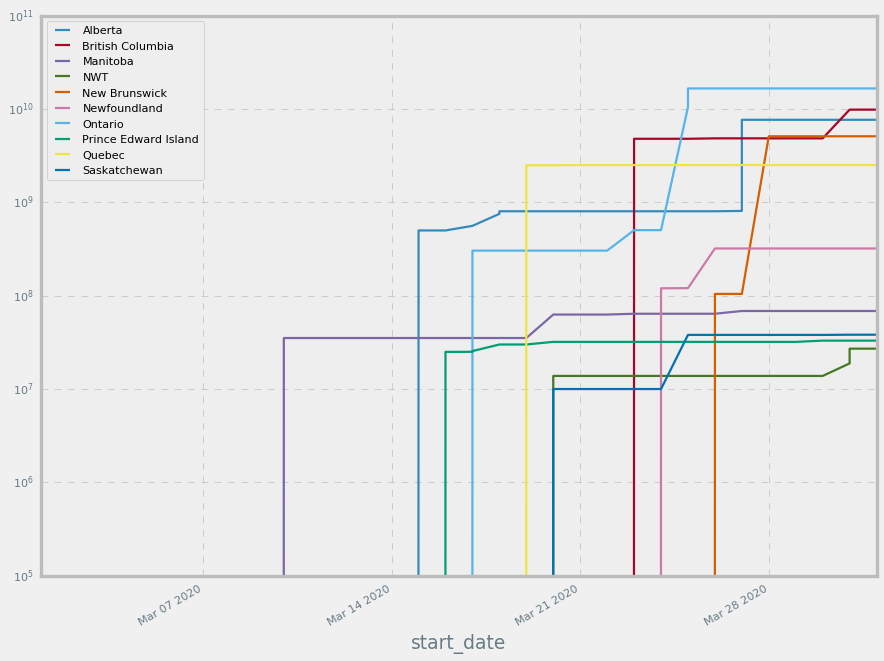

In [447]:
fig, ax = plt.subplots(figsize=(12,10))

dates = pd.date_range(start='03-01-2020', end='04-01-2020', name='dates').to_series() #mm-dd-yyyy
gb = provinces_df[provinces_df['oxford_fiscal_measure_cad'].notna()][['start_date', 'region', 'oxford_fiscal_measure_cad']].groupby(by='region')

for g_name, g_df in gb:
    
    all_dates_df = g_df.join(dates, on='start_date', how='right')
    all_dates_df['oxford_fiscal_measure_cad'] = all_dates_df['oxford_fiscal_measure_cad'].fillna(0)
    all_dates_df = all_dates_df.sort_values(by='start_date', ascending=True)
    all_dates_df['oxford_fiscal_measure_cad_cumsum'] = all_dates_df['oxford_fiscal_measure_cad'].cumsum(axis=0)
    #print(all_dates_df)

    all_dates_df.plot(x='start_date', y='oxford_fiscal_measure_cad_cumsum', label=g_name, ax=ax)

plt.yscale('log')

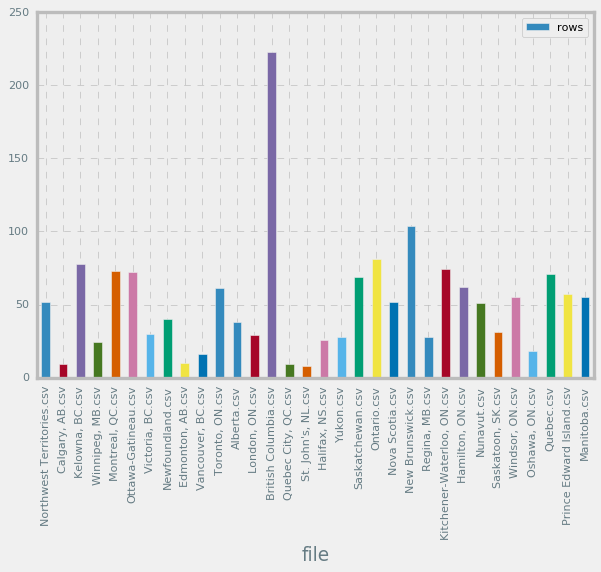

In [448]:
stats_df.plot.bar(x='file', y='rows')

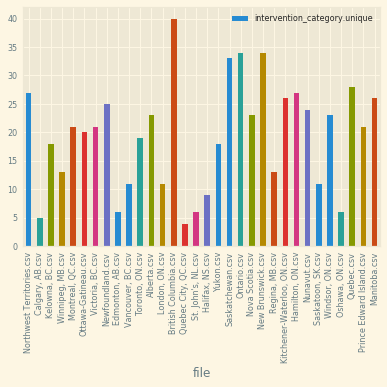

In [279]:
stats_df.plot.bar(x='file', y='intervention_category.unique')

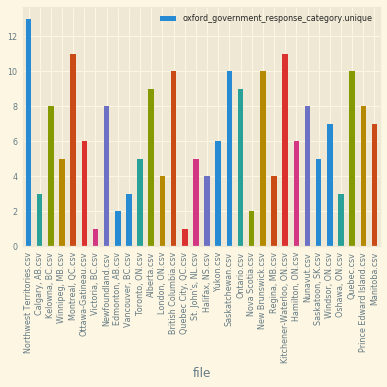

In [280]:
stats_df.plot.bar(x='file', y='oxford_government_response_category.unique')

In [283]:
stats_provs_df = stats_df[stats_df['file'].isin(provinces)]

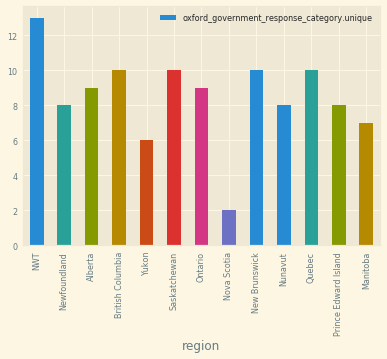

In [284]:
stats_provs_df.plot.bar(x='region', y='oxford_government_response_category.unique')

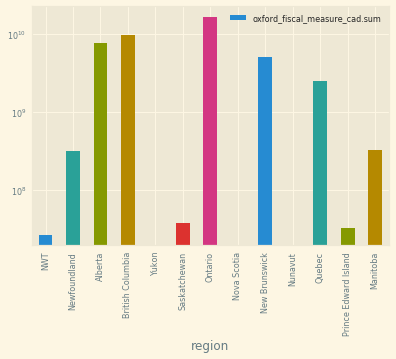

In [285]:
stats_provs_df.plot.bar(x='region', y='oxford_fiscal_measure_cad.sum', log=True)

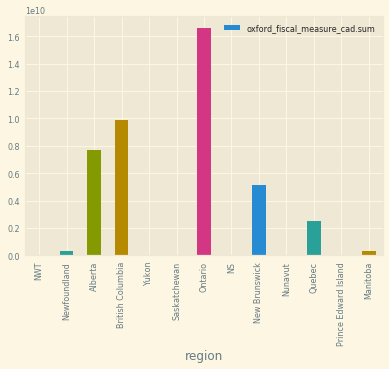

In [275]:

stats_provs_df.plot.bar(x='region', y='oxford_fiscal_measure_cad.sum')

## Comparison of Ontario Interventions with Case Data

In [2]:
test_data_path = '../../data/covid19/'
df_c19test_on = pd.read_csv( data_path + 'test_data_on.csv' )

In [5]:
df_npi_on = pd.read_csv( './npi_ontario.csv' )

In [30]:
dates_int_counts = df_npi_on.groupby(by='start_date').count()['intervention_category']

In [43]:
graph_scale=20
ninterventions = df_npi_on.groupby(by='start_date').count()['intervention_category'].values * graph_scale

In [44]:
ndates = list(df_npi_on.groupby(by='start_date').groups.keys())

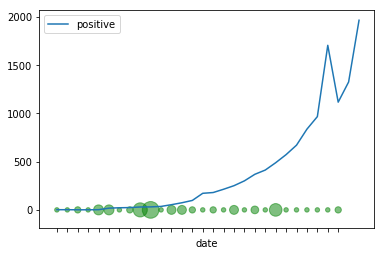

In [48]:
df_c19test_on.plot(x='date', y='positive')
plt.scatter(x=ndates, y=np.zeros(len(ndates)), s=ninterventions, c='g', label='interventions', alpha=0.5)